# Unit 12 - Tales from the Crypto

---


## 1. Sentiment Analysis

Use the [newsapi](https://newsapi.org/) to pull the latest news articles for Bitcoin and Ethereum and create a DataFrame of sentiment scores for each coin.

Use descriptive statistics to answer the following questions:
1. Which coin had the highest mean positive score?
2. Which coin had the highest negative score?
3. Which coin had the highest positive score?

In [1]:
# Initial imports
import os
import pandas as pd
from dotenv import load_dotenv
import nltk as nltk
nltk.download('vader_lexicon')
from nltk.sentiment.vader import SentimentIntensityAnalyzer
analyzer = SentimentIntensityAnalyzer()
load_dotenv()

%matplotlib inline

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dana0\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [2]:
# Read your api key environment variable
load_dotenv()
api_key = os.getenv("NEWS_API_KEY")

In [3]:
# Create a newsapi client
from newsapi import NewsApiClient
newsapi = NewsApiClient(api_key=api_key)

In [4]:
# Fetch the Bitcoin news articles
bitcoin_headlines = newsapi.get_everything(q="bitcoin", language="en", sort_by= "relevancy")
bitcoin_headlines

{'status': 'ok',
 'totalResults': 9664,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Kris Holt',
   'title': 'New York passes a bill to limit bitcoin mining',
   'description': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of Governor Kathy Hochul, who will sign it into law or veto th…",
   'url': 'https://www.engadget.com/new-york-cryptocurrency-bill-bitcoin-mining-climate-change-161126292.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2021-05/a8217250-bdfa-11eb-bfc4-2663225cea83',
   'publishedAt': '2022-06-03T16:11:26Z',
   'content': "New York lawmakers have passed a bill\r\n that would temporarily ban new bitcoin\r\n mining operations. Early on Friday, state senators voted 36-27 to pass the legislation. It's now bound for the desk of… [+2036 chars]"},
  {'source': {'id': 

In [5]:
# Fetch the Ethereum news articles
ethereum_headlines = newsapi.get_everything(q="ethereum", language="en", sort_by= "relevancy")
ethereum_headlines

{'status': 'ok',
 'totalResults': 4557,
 'articles': [{'source': {'id': 'engadget', 'name': 'Engadget'},
   'author': 'Jon Fingas',
   'title': "Here's what NFTs look like on Instagram",
   'description': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital wallet and posting for the world to see. If you like, the social …",
   'url': 'https://www.engadget.com/instagram-nft-details-131020868.html',
   'urlToImage': 'https://s.yimg.com/os/creatr-uploaded-images/2022-05/2546c160-d05e-11ec-b75e-e45eaa8c5b2b',
   'publishedAt': '2022-05-10T13:10:20Z',
   'content': "Meta has revealed more of how NFTs will work on Instagram. In the US-based test, you can show what you've bought or created for free by connecting your Instagram account to a compatible digital walle… [+1223 chars]"},
  {'source': {'id': None, 'name': 'Gizmodo.com'},
   'author': 'Kyle Ba

In [6]:
# Create the Bitcoin sentiment scores DataFrame
articles = []
for article in bitcoin_headlines["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

        articles.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
btc = pd.DataFrame(articles)
btc.head()

,text,compound,positive,negative,neutral
0,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902
1,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964
2,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882
3,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960
4,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928


In [7]:
# Create the Ethereum sentiment scores DataFrame
articles = []
for article in ethereum_headlines["articles"]:
    try:
        text = article["content"]
        results = analyzer.polarity_scores(text)
        compound = results["compound"]
        pos = results["pos"]
        neg = results["neg"]
        neu = results["neu"]

        articles.append({
            "text": text,
            "compound": compound,
            "positive": pos,
            "negative": neg,
            "neutral": neu
        })
    except AttributeError:
        pass
eth = pd.DataFrame(articles)
eth.head()

,text,compound,positive,negative,neutral
0,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865
1,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960
2,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945
3,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954
4,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902


In [8]:
# Describe the Bitcoin Sentiment
btc.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.097260,0.053650,0.068700,0.877700
std,0.371016,0.061442,0.055068,0.087077
min,-0.557400,0.000000,0.000000,0.557000
25%,-0.386825,0.000000,0.040000,0.858000
50%,-0.187950,0.041500,0.064500,0.888500
75%,0.156025,0.077500,0.087500,0.924250
max,0.750600,0.202000,0.241000,0.964000


In [9]:
# Describe the Ethereum Sentiment
eth.describe()

,compound,positive,negative,neutral
count,20.000000,20.000000,20.000000,20.000000
mean,-0.050445,0.040350,0.046450,0.913300
std,0.399819,0.054699,0.048242,0.050061
min,-0.690800,0.000000,0.000000,0.822000
25%,-0.381800,0.000000,0.000000,0.874750
50%,-0.127900,0.000000,0.045000,0.924000
75%,0.181000,0.072750,0.077000,0.954250
max,0.690800,0.178000,0.178000,1.000000


### Questions:

Q: Which coin had the highest mean positive score?

A: Ethereum seems to have the highest mean.

Q: Which coin had the highest compound score?

A: Ethereum also seems to be the highest compound score

Q. Which coin had the highest positive score?

A: Ethereum also had the highest positive score.

---

## 2. Natural Language Processing
---
###   Tokenizer

In this section, you will use NLTK and Python to tokenize the text for each coin. Be sure to:
1. Lowercase each word.
2. Remove Punctuation.
3. Remove Stopwords.

In [11]:
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer
from string import punctuation
import re

In [12]:
# Instantiate the lemmatizer
wnl = WordNetLemmatizer()

# Create a list of stopwords
stop = stopwords.words('english')

# Expand the default stopwords list if necessary
stop.append("u")
stop.append("it'")
stop.append("'s")
stop.append("n't")
stop.append('…')
stop.append("\`")
stop.append('``')
stop.append('char')
stop.append("''")
stop = set(stop)

In [13]:
# Complete the tokenizer function
def tokenizer(text):
    """Tokenizes text."""
   
    # Create a tokenized list of the words
    words = word_tokenize(text)
    
    # Remove the punctuation from text
    words = list(filter(lambda t : t not in punctuation, words))        
   
    # Convert the words to lowercase
    words = list(filter(lambda t : t.lower(), words))
    
    # Remove the stop words
    words = list(filter(lambda t : t.lower() not in stop, words)) 
    
    # Lemmatize words into root words
    tokens = [wnl.lemmatize(word) for word in words]
    
    return tokens

In [14]:
# Create a new tokens column for Bitcoin
btc["Tokens"] = btc.text.apply(tokenizer)
btc.head()

,text,compound,positive,negative,neutral,Tokens
0,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmaker, passed, bill, would, tem..."
1,"Now, even though there are a number of women-f...",0.0772,0.036,0.000,0.964,"[even, though, number, women-focused, crypto, ..."
2,A Bitcoin mining site powered by otherwise los...,-0.0516,0.056,0.061,0.882,"[Bitcoin, mining, site, powered, otherwise, lo..."
3,You can now reportedly pay for your burritos a...,-0.1027,0.000,0.040,0.960,"[reportedly, pay, burrito, taco, Bitcoin, digi..."
4,"Image source, Getty Images\r\nThe value of Bit...",0.3400,0.072,0.000,0.928,"[Image, source, Getty, Images, value, Bitcoin,..."


In [15]:
# Create a new tokens column for Ethereum
eth["Tokens"] = eth.text.apply(tokenizer)
eth.head()

,text,compound,positive,negative,neutral,Tokens
0,Meta has revealed more of how NFTs will work o...,0.6486,0.135,0.000,0.865,"[Meta, revealed, NFTs, work, Instagram, US-bas..."
1,GameStop has officially thrown itself headlong...,-0.1027,0.000,0.040,0.960,"[GameStop, officially, thrown, headlong, web3,..."
2,When Bored Ape Yacht Club creators Yuga Labs a...,-0.2732,0.000,0.055,0.945,"[Bored, Ape, Yacht, Club, creator, Yuga, Labs,..."
3,GameStop is going all-in on crypto. The video ...,0.1280,0.046,0.000,0.954,"[GameStop, going, all-in, crypto, video, game,..."
4,New York lawmakers have passed a bill\r\n that...,-0.5574,0.000,0.098,0.902,"[New, York, lawmaker, passed, bill, would, tem..."


---

### NGrams and Frequency Analysis

In this section you will look at the ngrams and word frequency for each coin. 

1. Use NLTK to produce the n-grams for N = 2. 
2. List the top 10 words for each coin. 

In [16]:
from collections import Counter
from nltk import ngrams

In [17]:
# Generate the Bitcoin N-grams where N=2
N = 2
grams = ngrams(tokenizer(btc.text.str.cat()), N)
Counter(grams).most_common(20)

[(('Reuters', 'Bitcoin'), 4),
 (('char', 'May'), 4),
 (('previous', 'close'), 3),
 (('close', 'Bitcoin'), 3),
 (('Bitcoin', 'world'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'best-known'), 3),
 (('best-known', 'cryptocurrency'), 3),
 (('Getty', 'Images'), 2),
 (('pay', 'burrito'), 2),
 (('dramatic', 'drop'), 2),
 (('interest', 'rate'), 2),
 (('char', 'Terra'), 2),
 (('new', 'blockchain'), 2),
 (('blockchain', 'new'), 2),
 (('new', 'luna'), 2),
 (('luna', 'token'), 2),
 (('Seth', 'Green'), 2),
 (('Green', 'animated'), 2),
 (('animated', 'show'), 2)]

In [18]:
# Generate the Ethereum N-grams where N=2
N = 2
grams = ngrams(tokenizer(eth.text.str.cat()), N)
Counter(grams).most_common(20)

[(('char', 'May'), 3),
 (('Reuters', 'Bitcoin'), 3),
 (('previous', 'close'), 3),
 (('close', 'Bitcoin'), 3),
 (('Bitcoin', 'world'), 3),
 (('world', 'biggest'), 3),
 (('biggest', 'best-known'), 3),
 (('best-known', 'cryptocurrency'), 3),
 (('char', 'GameStop'), 2),
 (('New', 'York'), 2),
 (('bill', 'would'), 2),
 (('mining', 'operation'), 2),
 (('Lite', 'Hash'), 2),
 (('Hash', 'Rate'), 2),
 (('graphic', 'card'), 2),
 (('poster', 'participating'), 2),
 (('cryptocurrency', 'mining'), 2),
 (('char', 'cryptocurrency'), 2),
 (('cryptocurrency', 'boom'), 2),
 (('boom', 'past'), 2)]

In [19]:
# Function token_count generates the top 10 words for a given coin
def token_count(tokens, N=3):
    """Returns the top N tokens from the frequency count"""
    return Counter(tokens).most_common(N)

In [20]:
# Use token_count to get the top 10 words for Bitcoin
all_tokens = tokenizer(btc.text.str.cat())
token_count(all_tokens, 10)

[('char', 19),
 ('Bitcoin', 11),
 ('cryptocurrency', 7),
 ('new', 6),
 ('world', 6),
 ('week', 6),
 ('Reuters', 5),
 ('biggest', 4),
 ('May', 4),
 ('token', 4)]

In [21]:
# Use token_count to get the top 10 words for Ethereum
all_tokens = tokenizer(eth.text.str.cat())
token_count(all_tokens, 10)

[('char', 20),
 ('cryptocurrency', 11),
 ('Bitcoin', 9),
 ('world', 5),
 ('year', 5),
 ('digital', 4),
 ('NFT', 4),
 ('biggest', 4),
 ('May', 4),
 ('Reuters', 4)]

---

### Word Clouds

In this section, you will generate word clouds for each coin to summarize the news for each coin

In [22]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20.0, 10.0]

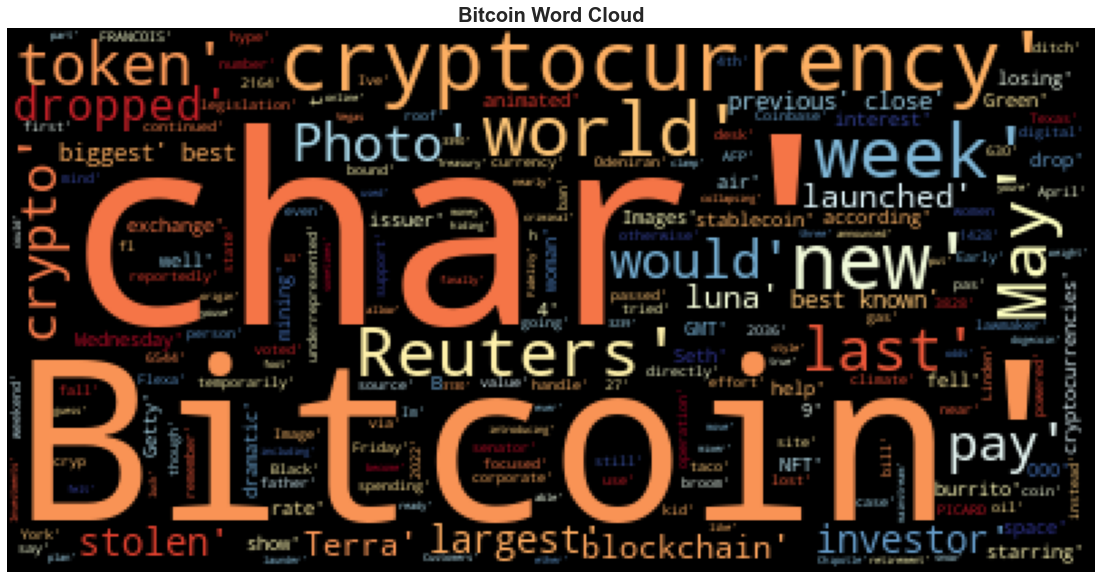

In [23]:
# Generate the Bitcoin word cloud
terms_list = str(btc["Tokens"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Bitcoin Word Cloud", fontdict=fontdict)
plt.show()

In [ ]:
# Generate the Ethereum word cloud
terms_list = str(eth["Tokens"].tolist())
wordcloud = WordCloud(colormap="RdYlBu").generate(terms_list)
plt.imshow(wordcloud)
plt.axis("off")
fontdict = {"fontsize": 20, "fontweight": "bold"}
plt.title("Ethereum Word Cloud", fontdict=fontdict)
plt.show()

---
## 3. Named Entity Recognition

In this section, you will build a named entity recognition model for both Bitcoin and Ethereum, then visualize the tags using SpaCy.

In [ ]:
import spacy
from spacy import displacy

In [ ]:
# Download the language model for SpaCy
# !python -m spacy download en_core_web_sm

In [ ]:
# Load the spaCy model
nlp = spacy.load('en_core_web_sm')

---
### Bitcoin NER

In [ ]:
# Concatenate all of the Bitcoin text together
all_btc_text = btc.text.str.cat()
all_btc_text

In [ ]:
# Run the NER processor on all of the text
doc = nlp(all_btc_text)

# Add a title to the document
doc.user_data["title"] = "Bitcoin NER"

In [ ]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

---

### Ethereum NER

In [ ]:
# Concatenate all of the Ethereum text together
all_eth_text = eth.text.str.cat()
all_eth_text

In [ ]:
# Run the NER processor on all of the text
doc = nlp(all_eth_text)

# Add a title to the document
doc.user_data["title"] = "Ethereum NER"

In [ ]:
# Render the visualization
displacy.render(doc, style='ent')

In [ ]:
# List all Entities
for ent in doc.ents:
    print(ent.text, ent.label_)

---